In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Salary Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [4]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [5]:
df.drop(['Gender','Education Level','Job Title'],axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Years of Experience  373 non-null    float64
 2   Salary               373 non-null    float64
dtypes: float64(3)
memory usage: 8.9 KB


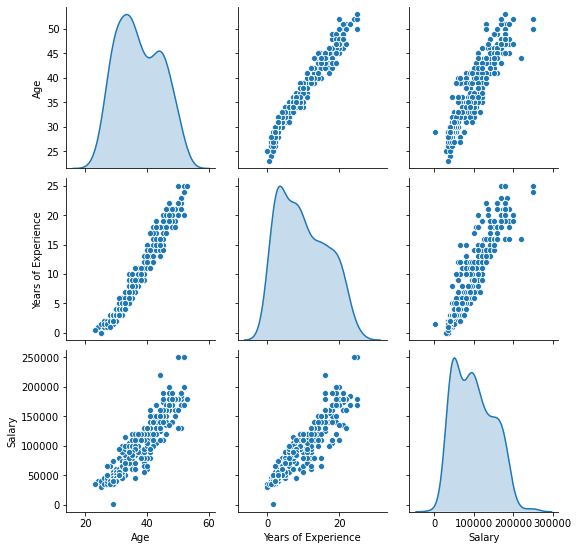

In [7]:
sns.pairplot(df,diag_kind='kde')

In [8]:
nan_values=df[df.isnull().any(axis=1)]
nan_values

,Age,Years of Experience,Salary
172,NaN,NaN,NaN
260,NaN,NaN,NaN


In [9]:
#df.dropna(inplace=True)

In [10]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Years of Experience']=df['Years of Experience'].fillna(df['Years of Experience'].mean())
df['Salary']=df['Salary'].fillna(df['Salary'].mean())

In [11]:
#df.isnull().sum()
df.count()

Age                    375
Years of Experience    375
Salary                 375
dtype: int64

In [12]:
df=df.append({'Age':'36','Years of Experience': '8', 'Salary': '550000'},ignore_index=True)
df

,Age,Years of Experience,Salary
0,32,5,90000
1,28,3,65000
2,45,15,150000
3,36,7,60000
4,52,20,200000
...,...,...,...
371,43,19,170000
372,29,2,40000
373,34,7,90000
374,44,15,150000


In [13]:
X=df.drop('Salary',axis=1)
y=df['Salary']

In [14]:
X

,Age,Years of Experience
0,32,5
1,28,3
2,45,15
3,36,7
4,52,20
...,...,...
371,43,19
372,29,2
373,34,7
374,44,15


In [15]:
y

0       90000
1       65000
2      150000
3       60000
4      200000
        ...  
371    170000
372     40000
373     90000
374    150000
375    550000
Name: Salary, Length: 376, dtype: object

In [16]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.5, test_size=0.5, random_state=0)

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred=lr.predict(X_test)
y_pred

array([ 68408.35325428, 143567.38526729,  63783.20499809,  54743.07470646,
        84281.12281982, 168480.28512446,  47910.43543255,  84491.28904057,
       184563.22091075, 116236.82817165,  54743.07470646,  45702.94441483,
       191395.86018466,  47910.43543255, 145774.87628501, 184563.22091075,
        50328.09267102,  59368.22296265, 175523.09061912,  88906.27107601,
       139152.40323185, 129902.10671947,  54743.07470646,  91323.92831448,
        97946.40136764, 170897.94236293, 166272.79410674,  86698.78005829,
       120651.81020709,  48120.6016533 ,  88906.27107601,  68618.51947503,
       102571.54962383,  43495.45339711, 161857.8120713 ,  97946.40136764,
        52535.58368874,  34560.40621585,  50328.09267102, 104989.2068623 ,
       129902.10671947,  54743.07470646,  91323.92831448,  88906.27107601,
        43495.45339711, 143567.38526729,  43390.37028674,  45702.94441483,
        45702.94441483,  84491.28904057, 136734.74599338,  59368.22296265,
        68408.35325428,  

In [21]:
from sklearn.metrics import mean_absolute_error , mean_squared_error,r2_score,classification_report,accuracy_score

In [22]:
print("MAE -",mean_absolute_error(y_pred,y_test))
print("MSE -",mean_squared_error(y_pred,y_test))
print("R2 Score -",r2_score(y_pred,y_test))

MAE - 13584.203697018162
MSE - 1374589100.514782
R2 Score - 0.28283422155406657


In [23]:
my_dict={'Actual': y_test, 'Predicted': y_pred}
my_df=pd.DataFrame(my_dict)

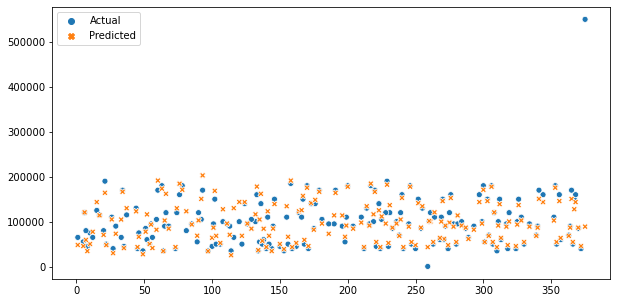

In [24]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=my_df)
plt.show()

# Normalization

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [26]:
scaler=MinMaxScaler()
norm_fit=scaler.fit_transform(df)

In [27]:
norm_df=pd.DataFrame(data=norm_fit)
norm_df

,0,1,2
0,0.300000,0.20,0.163104
1,0.166667,0.12,0.117620
2,0.733333,0.60,0.272264
3,0.433333,0.28,0.108524
4,0.966667,0.80,0.363231
...,...,...,...
371,0.666667,0.76,0.308651
372,0.200000,0.08,0.072137
373,0.366667,0.28,0.163104
374,0.700000,0.60,0.272264


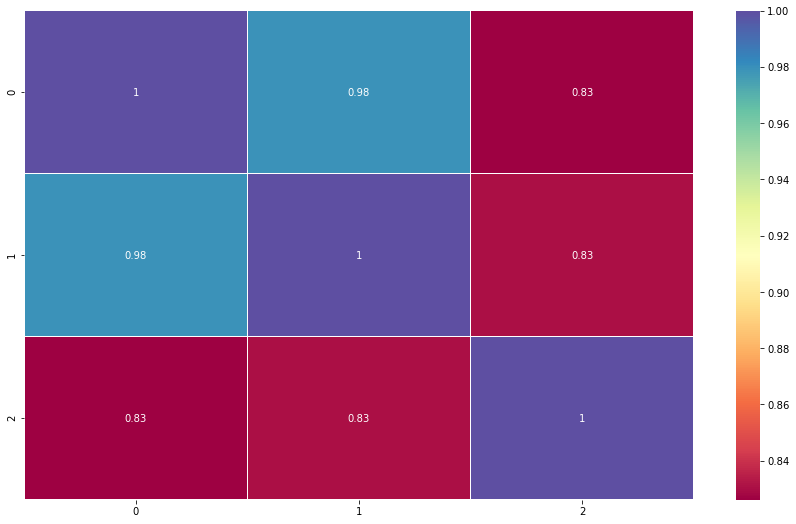

In [28]:
plt.figure(figsize = (15, 9))
sns.heatmap(norm_df.corr(), annot = True, linewidth = 0.5, cmap = "Spectral")
plt.show()

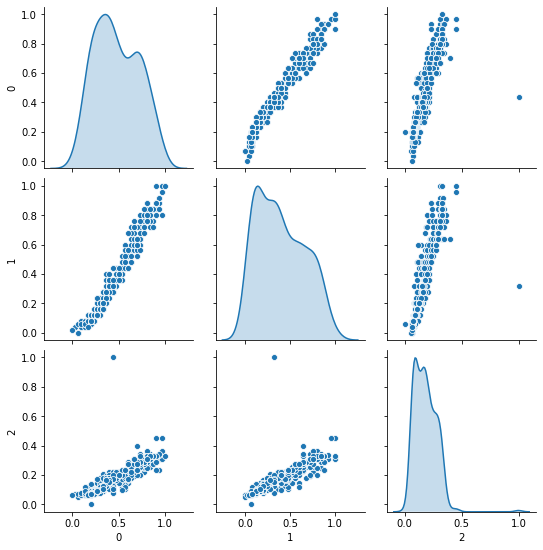

In [29]:
sns.pairplot(norm_df,diag_kind='kde')

In [30]:
norm_X=norm_df.drop(2,axis=1)

In [31]:
norm_y=norm_df[2]

In [32]:
norm_y

0      0.163104
1      0.117620
2      0.272264
3      0.108524
4      0.363231
         ...   
371    0.308651
372    0.072137
373    0.163104
374    0.272264
375    1.000000
Name: 2, Length: 376, dtype: float64

In [33]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(norm_X, norm_y,train_size=0.5, test_size=0.5, random_state=0)

In [34]:
lr.fit(X_train_norm,y_train_norm)

LinearRegression()

In [35]:
lr.intercept_

0.041585921579422425

In [36]:
y_pred_norm=lr.predict(X_test_norm)

In [37]:
y_pred_norm

array([0.12382126, 0.26056106, 0.11540654, 0.09895947, 0.15269921,
       0.30588608, 0.08652858, 0.15308158, 0.3351464 , 0.21083749,
       0.09895947, 0.08251241, 0.34757729, 0.08652858, 0.26457723,
       0.3351464 , 0.09092712, 0.10737419, 0.31869934, 0.16111393,
       0.25252871, 0.23569928, 0.09895947, 0.16551247, 0.177561  ,
       0.31028462, 0.30186991, 0.15709775, 0.21886984, 0.08691095,
       0.16111393, 0.12420362, 0.18597571, 0.07849623, 0.29383755,
       0.177561  , 0.0949433 , 0.06224035, 0.09092712, 0.19037425,
       0.23569928, 0.09895947, 0.16551247, 0.16111393, 0.07849623,
       0.26056106, 0.07830505, 0.08251241, 0.08251241, 0.15308158,
       0.24813017, 0.10737419, 0.12382126, 0.17354482, 0.14868304,
       0.22728456, 0.27337431, 0.12783743, 0.18635807, 0.22326838,
       0.20242278, 0.15709775, 0.27739049, 0.11980508, 0.32271551,
       0.06204916, 0.16952864, 0.11139036, 0.08652858, 0.15709775,
       0.25654488, 0.07448006, 0.06204916, 0.20643895, 0.31028

In [38]:
print("MAE -",mean_absolute_error(y_pred_norm,y_test_norm))
print("MSE -",mean_squared_error(y_pred_norm,y_test_norm))
print("R2 Score -",r2_score(y_pred_norm,y_test_norm))

MAE - 0.024714279445134473
MSE - 0.004549885120413931
R2 Score - 0.28283422155406623


In [39]:
my_dict_norm={'Actual': y_test_norm, 'Predicted': y_pred_norm}
my_norm_df=pd.DataFrame(my_dict_norm)

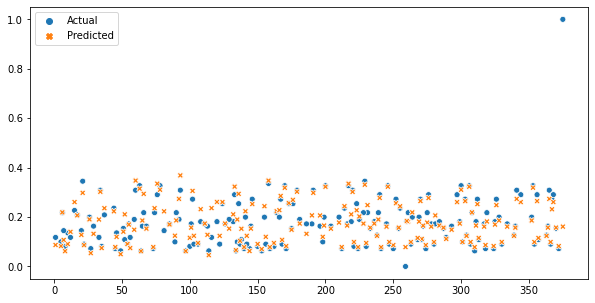

In [40]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=my_norm_df)
plt.show()

# Standardization

In [41]:
std_df=df
std_df

,Age,Years of Experience,Salary
0,32,5,90000
1,28,3,65000
2,45,15,150000
3,36,7,60000
4,52,20,200000
...,...,...,...
371,43,19,170000
372,29,2,40000
373,34,7,90000
374,44,15,150000


In [42]:
std_scaler=StandardScaler()
std_fit=std_scaler.fit_transform(std_df)
std_fit

array([[-0.77190202, -0.77043177, -0.22098332],
       [-1.34074985, -1.07704504, -0.69025724],
       [ 1.07685342,  0.76263461,  0.90527409],
       ...,
       [-0.48747811, -0.46381849, -0.22098332],
       [ 0.93464146,  0.76263461,  0.90527409],
       [-0.20305419, -0.31051185,  8.41365683]])

In [43]:
std_fit_df=pd.DataFrame(data=std_fit)
std_fit_df

,0,1,2
0,-0.771902,-0.770432,-0.220983
1,-1.340750,-1.077045,-0.690257
2,1.076853,0.762635,0.905274
3,-0.203054,-0.463818,-0.784112
4,2.072337,1.529168,1.843822
...,...,...,...
371,0.792430,1.375861,1.280693
372,-1.198538,-1.230352,-1.159531
373,-0.487478,-0.463818,-0.220983
374,0.934641,0.762635,0.905274


In [44]:
std_fit_df.describe().round(3)

,0,1,2
count,376.000,376.000,376.000
mean,0.000,0.000,-0.000
std,1.001,1.001,1.001
min,-2.052,-1.537,-1.904
25%,-0.807,-0.924,-0.878
50%,-0.203,-0.157,-0.127
75%,0.935,0.763,0.718
max,2.215,2.296,8.414


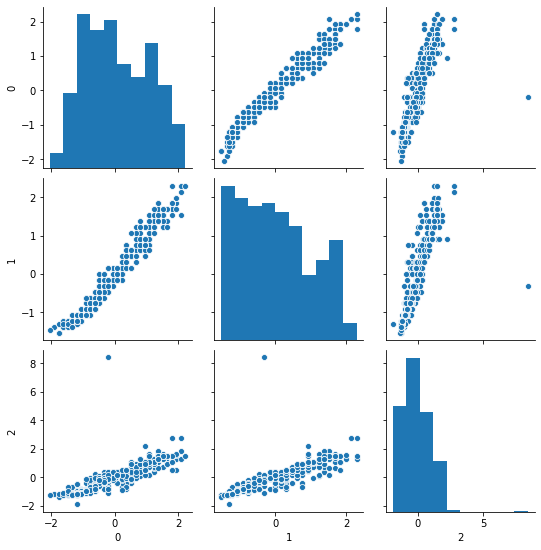

In [45]:
sns.pairplot(std_fit_df)

In [46]:
std_x=std_fit_df.drop(2,axis=1)
std_x

,0,1
0,-0.771902,-0.770432
1,-1.340750,-1.077045
2,1.076853,0.762635
3,-0.203054,-0.463818
4,2.072337,1.529168
...,...,...
371,0.792430,1.375861
372,-1.198538,-1.230352
373,-0.487478,-0.463818
374,0.934641,0.762635


In [47]:
std_y=std_fit_df[2]
std_y

0     -0.220983
1     -0.690257
2      0.905274
3     -0.784112
4      1.843822
         ...   
371    1.280693
372   -1.159531
373   -0.220983
374    0.905274
375    8.413657
Name: 2, Length: 376, dtype: float64

In [48]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(std_x, std_y,train_size=0.5 ,test_size=0.5, random_state=42)

In [49]:
lr.fit(X_train_std, y_train_std)

LinearRegression()

In [50]:
lr.intercept_

0.01982571689214485

In [51]:
y_pred_std=lr.predict(X_test_std)

In [52]:
print("MAE -",mean_absolute_error(y_pred_std,y_test))
print("MSE -",mean_squared_error(y_pred_std,y_test))
print("R2 Score -",r2_score(y_pred_std,y_test))

MAE - 99074.10963820819
MSE - 12912195445.32129
R2 Score - -18387905045.923088


In [53]:
my_dict_std={'Actual': y_test_std, 'Predicted': y_pred_std}
my_std_df=pd.DataFrame(my_dict_std)

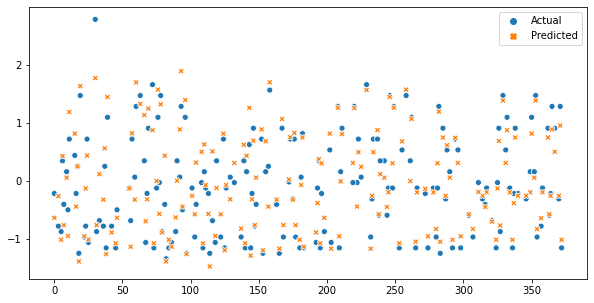

In [54]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=my_std_df)
plt.show()

# Using Decision Tree

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [56]:
#pre-pruning
parameter={
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4],
    'max_features':['auto','sqrt','log2']
}

In [57]:
regressor= DecisionTreeRegressor()
cv=GridSearchCV(regressor,param_grid=parameter,cv=5,scoring='accuracy')

In [58]:
cv.fit(X_train,y_train)

C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\abhishek\anaconda3\lib\

C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pre

C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pre

C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pre

C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pre

C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pre

C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pre

C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pre

C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pre

C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pre

C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pre

C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pre

C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\abhishek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pre

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [59]:
#from sklearn import tree
#plt.figure(figsize=(50,20))
#tree.plot_tree(regressor,filled=True)

In [60]:
#predicting the new value
#y_pred_tree=regressor.predict(X_test).round()

In [61]:
#y_pred_tree

In [65]:
# print("MAE -",mean_absolute_error(y_pred_tree,y_test))
# print("MSE -",mean_squared_error(y_pred_tree,y_test))
# print("R2 Score -",r2_score(y_pred_tree,y_test))

In [68]:
# my_dict_tree={'Actual': y_test, 'Predicted': y_pred_tree}
# my_tree_df=pd.DataFrame(my_dict_tree)

In [70]:
# plt.figure(figsize=(10,5))
# sns.scatterplot(data=my_std_df)
# plt.show()

In [71]:
cv.best_params_

{'criterion': 'squared_error',
 'max_depth': 1,
 'max_features': 'auto',
 'splitter': 'best'}

In [72]:
y_pred_cv=cv.predict(X_test).round()

In [73]:
print("MAE -",mean_absolute_error(y_pred_cv,y_test))
print("MSE -",mean_squared_error(y_pred_cv,y_test))
print("R2 Score -",r2_score(y_pred_cv,y_test))

MAE - 27787.592265130337
MSE - 2123415639.8940108
R2 Score - -0.2557870126774755


In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
rfr=RandomForestRegressor()

In [76]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [77]:
y_pred_rfr=rfr.predict(X_test)

In [78]:
y_pred_rfr

array([ 71590.        , 171882.14285714,  59975.        ,  52373.05555556,
        61292.30769231, 168838.34415584,  40100.        ,  90189.96031746,
       163926.19047619, 117835.71428571,  52373.05555556,  40000.        ,
       156390.47619048,  40100.        , 165012.57215007, 163926.19047619,
        50351.40873016,  53566.91558442, 177031.66666667,  85215.72774448,
       156607.85714286, 134525.        ,  52373.05555556,  95350.        ,
       110796.66666667, 171999.16666667, 177279.53463203,  85634.20454545,
       120961.9047619 ,  46792.59920635,  85215.72774448,  91433.33333333,
        98068.83394383,  40058.33333333, 157508.33333333, 110796.66666667,
        51644.68253968,  40779.16666667,  50351.40873016, 101015.94816801,
       134525.        ,  52373.05555556,  95350.        ,  85215.72774448,
        40058.33333333, 171882.14285714,  36805.95238095,  40000.        ,
        40000.        ,  90189.96031746, 133834.21703297,  53566.91558442,
        71590.        ,  

In [79]:
print("MAE -",mean_absolute_error(y_pred_rfr,y_test))
print("MSE -",mean_squared_error(y_pred_rfr,y_test))
print("R2 Score -",r2_score(y_pred_rfr,y_test))

MAE - 14292.151888325363
MSE - 1447177439.3219264
R2 Score - 0.27699870916240477


In [ ]:
scores=[{''}]